In [7]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})
# Standard includes
import datetime
import re
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
import matplotlib.pyplot as plt
from time import time

In [8]:
# Define the query
my_query = {
  "size": 0,
  "query": {
    "filtered": {
      "query": { "match_all": {} },
      "filter": {
        "bool": {
          "must": [
            {
              "range": {
                "@timestamp": {
                  "gte": 1451602800000,
                  "lte": 1475618400000,
                  "format": "epoch_millis"
                }
              }
            },
            {"term": {"event_type": "transfer-failed"}},
            {"term": {"payload.scope": "data16_13TeV"}}
          ],
          "must_not": []
        }
      }
    }
  }
}

In [9]:
es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)
my_index = "rucio-events*"
scroll = scan(es, query=my_query, index=my_index, scroll='5m', timeout="5m", size=100)

In [17]:
count=0
t0 = time()
allSizes = []
for res in scroll:
    if not count%1000:  print(count)
    if count<1: print(res)
    count += 1
    if res['_source']['event_type']=='transfer-failed':
        allSizes.append(res['_source']['payload']['file-size'])
    

    

0
{'_id': 'AVXLzk1Zd25u_mmDyDTu', '_type': 'rucio-event', '_index': 'rucio-events-2016.07.08', '_source': {'created_at': '2016-07-08 18:38:57', '@timestamp': '2016-07-08T18:39:01.221Z', 'type': 'rucio-event', 'payload': {'checksum-adler': 'bfa01583', 'src-url': 'gsiftp://eosatlassftp.cern.ch:2811/eos/atlas/atlastier0/rucio/data16_13TeV/physics_Main/00302829/data16_13TeV.00302829.physics_Main.daq.RAW/data16_13TeV.00302829.physics_Main.daq.RAW._lb1695._SFO-5._0002.data', 'created_at': None, 'name': 'data16_13TeV.00302829.physics_Main.daq.RAW._lb1695._SFO-5._0002.data', 'reason': 'Job has been canceled because it stayed in the queue for too long', 'duration': 0, 'scope': 'data16_13TeV', 'file-size': 2525153660, 'previous-request-id': None, 'transfer-endpoint': 'https://fts.usatlas.bnl.gov:8446', 'bytes': 2525153660, 'src-rse': 'CERN-PROD_TZDISK', 'dst-rse': 'TRIUMF-LCG2_SCRATCHDISK', 'protocol': 'srm', 'transfer-id': 'b8dbf22d-f9b3-5852-8506-5c6bf7fed2bc', 'request-id': '2aabb5d886ff461e9

In [18]:
t1 = time()
print (count, 'events in %f seconds.' %(t1-t0), count/(t1-t0), "ev/s.")

3262840 events in 218.956663 seconds. 14901.761624112947 ev/s.


(array([  1.18577900e+06,   4.41912000e+05,   1.47682700e+06,
          5.46400000e+04,   7.06570000e+04,   1.51910000e+04,
          1.49600000e+04,   2.66600000e+03,   1.54000000e+02,
          5.40000000e+01]),
 array([  3.31200000e+03,   9.96964598e+08,   1.99392588e+09,
          2.99088717e+09,   3.98784846e+09,   4.98480974e+09,
          5.98177103e+09,   6.97873232e+09,   7.97569360e+09,
          8.97265489e+09,   9.96961618e+09]),
 <a list of 10 Patch objects>)

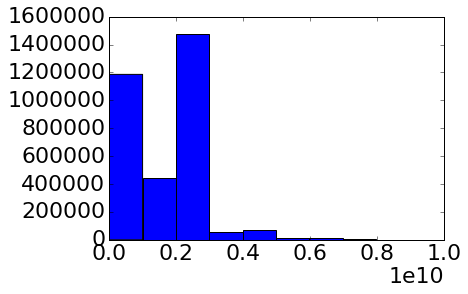

In [19]:
plt.hist(allSizes)